# Statistics

## Motivation

So far, we have often looked at data. For example, in [Chapter 3](03_Data-Exploration) we visually analyzed the distributions of data. Below are two histograms of data that we could also visually analyze.

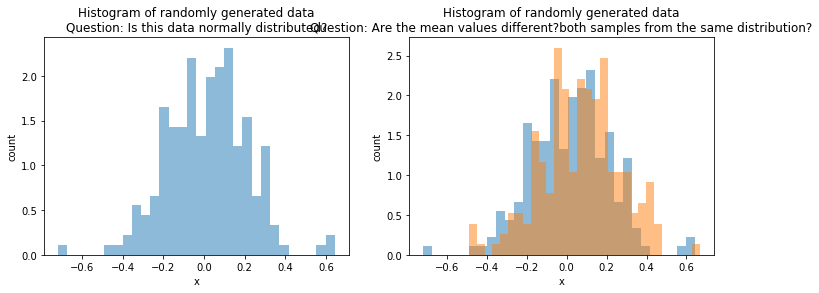

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# generate data
np.random_state = 42
mu, sigma = 0, 0.2 # mean and standard deviation
s1 = np.random.normal(mu, sigma, 200)
s2 = np.random.normal(mu+0.05, sigma, 200)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].hist(s1, 30, density=True, alpha=0.5)
axes[0].set_title("Histogram of randomly generated data\nQuestion: Is this data normally distributed?")
axes[0].set_xlabel("x")
axes[0].set_ylabel("count")

axes[1].hist(s1, 30, density=True, alpha=0.5)
axes[1].hist(s2, 30, density=True, alpha=0.5)
axes[1].set_title("Histogram of randomly generated data\nQuestion: Are the mean values different?both samples from the same distribution?")
axes[1].set_xlabel("x")
axes[1].set_ylabel("count")

plt.show()

The histogram on the left looks like it has a bell shape, which indicates that the data may be normal. However, we cannot be sure, without additional analysis. It could would also be possible that the data just randomly looks like that, i.e., is some outlier and that the data is not really normal. 

The histogram on the left shows two samples, to which we refer in the following as "blue" and "orange". Both look similar, but it looks like the mean value of the blue data may be a bit smaller than that of the orange data. However, this could also just be a random effect, and there is no real difference. 

Statistics gives us the methods we need to get (probabilistic) answers to these questions. Within this Chapter, we give a short introduction into the (quite large) world of statistics. Upon completion of this chapter, you should know what hypothesis testing is, how this can be used correctly, and why hypothesis testing is often not useful, if used without additional statistical tools like effect size and confidence intervals. 

## Hypothesis Testing

Hypothesis testing is the primary tool of *frequentist statistics*. The idea behind hypothesis testing is the following. If we have certain assumptions on the data, we can formulate these assumptions as an hypothesis about the data. We always have two hypothesis, the *null hypothesis* and the *alternative hypothesis*. 

- Null Hypothesis ($H_0$): Assumption of the test holds and is failed to be rejected at some level of significance.
- Alternative Hypothesis ($H_1$, $H_a$): Assumption of the test does not hold and is rejected at some level of significance.

The question is, what these abstract concept mean. What exactly is the assumption of a test? What does "(failed to be) rejected at some level of significance" mean? Since these questions are often misunderstood and misused, we explain them using the example of the $t$-test. 

### $t$-Test

The $t$-Test can be seen as the father of all statistical tests and was first introduced by William Gosset under the pseodonym "Student". This oldest version of the test and the related probability distribution are there called Student's $t$-Test and Student's distribution. Here, we consider a newer variant of the $t$-Test, i.e., Welch's $t$-Test. Welch's $t$-Test has the following null and alternative hypotheses: 

- $H_0$: The means of two normally distributed populations $X_1$ and $X_2$ are equal.
- $H_a$: $X_1$ and $X_2$ are not from two normally distributed populations with equal mean values.

Thus, this test can be used to determine if two normally distributed populations have the same mean value. This is relevant in many use cases, e.g., to answer questions like "does this medication improve the health" or "is my deep neural network better than a random forest". Please note that the alternative hypothesis of the $t$-Test is not that the mean values are different. Only if both distributions are normal, this would mean that the mean values are different. If one of the populations is not normally distributed, we do not know whether the null hypothesis was rejected because the data was not normal or because the means are different. This misinterpretation of alternative hypothesis is one of the common mistakes when hypothesis testing is used. 

In order to determine evaluate whether the null hypothesis holds, hypothesis testing evaluates *how likely the data is, given the hypothesis*. For the $t$-Test this means that we want to calculate how likely it is that we observe the populations $X_1$ and $X_2$, in case both are normally distributed with the same mean value. This probability is the infamous *p-value*.

To determine the p-value, we need the probability density function of a test statistic. In case of the $t$-Test, this is Student's $t$-Distribution.

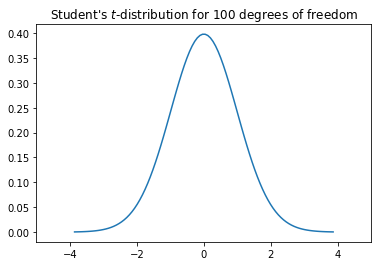

In [11]:
from scipy import stats

rv = stats.t(df=100, loc=0, scale=1)
x = np.linspace(rv.ppf(0.0001), rv.ppf(0.9999), 100)
y = rv.pdf(x) 

plt.figure()
plt.title("Student's $t$-distribution for 100 degrees of freedom")
plt.xlim(-5,5)
plt.plot(x,y)
plt.show()

This distribution looks similar to the normal distribution, the difference is that the tails are a bit longer than those of the normal distribution. Student's $t$-distribution is defined as the distribution of the  deviation of the arithmetic mean of a sample drawn from a standard normal distribution with a mean value of 0 and a standard deviation of 1 deviates. Thus, the $t$-Distribution tells us how much deviation of the mean values between two samples drawn from a standard normal distributions we can expect. This is directly related to the likelihood of the data, given the hypothesis that data is normal. 

The difference we still have is that the $t$ distribution is for a specific mean value and standard deviation, while our hypothesis is for normal distributions with any mean value and standard distribution. This is why we need a *test statistic*, in case of the $t$-Test the $t$ value, which is defined as

$$t = \frac{mean(X_1)-mean(X_2)}{\sqrt{\frac{sd(X_1)^2}{n_1}+\frac{sd(X_2)}{n_2}}}$$

A bit simplified, the test statistics $t$ us the rescaled the difference between the two populations $X_1$ and $X_2$ such that this is the difference to estimates the difference of the means as if they were two standard normal distributions. Thus, we can use the $t$ value and Student's $t$-distribution to calculate how probable it is, that these populations are observed, given that the means are not different. For this, we calculate the area under the $t$-distribution outside of $\pm t$. 

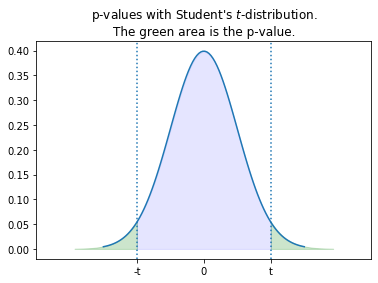

In [26]:
tvalue = 2
xfill = np.linspace(-tvalue, tvalue)
xfill_left = np.linspace(rv.ppf(0.0001),-tvalue)
xfill_right = np.linspace(rv.ppf(0.9999),tvalue)

plt.figure()
plt.title("p-values with Student's $t$-distribution.\nThe green area is the p-value.")
plt.axvline(tvalue, linestyle=':')
plt.axvline(-tvalue, linestyle=':')
plt.xlim(-5,5)
plt.xticks([-tvalue,0,tvalue], ['-t','0','t'])
plt.plot(x,y)
plt.fill_between(xfill, rv.pdf(xfill), y2=0, alpha=0.1, color='b')
plt.fill_between(xfill_left, rv.pdf(xfill_left), y2=0, alpha=0.2, color='g')
plt.fill_between(xfill_right, rv.pdf(xfill_right), y2=0, alpha=0.2, color='g')
plt.show()

The green area in the plot above is the probability, that the mean of a sample drawn from a standard normal distribution deviates by at least $t$ from 0. Since we calculated $t$ such that this is the same as the probability that the means of $X_1$ and $X_2$ are different, this is the p-value of the test, hence the probability that the data is observed given the null hypothesis is true. 

### Significance Level

Since the p-value is how likely the data is, given that the null hypothesis is true, it is reasonable to argue that the null hypothesis may not be true, if the p-value is very small, i.e., the data is very unlikely if the null hypothesis were true. This concept is formalized with the *significance level* $\alpha$ that is used to define the *statistical significance* of results. 

The significance level decides is defined as the (acceptable) probability of rejecting the null hypothesis, given that it is true. While the significance level depends on the domains, commonly used values are 0.05, or more recently also 0.005. With the significance level, we can decide if we reject the null hypothesis or not: 

- If $p-value > \alpha$ we fail to reject the null hypothesis. This means that the data can be reasonably well explained, if the null hypothesis were true. 
- If $p-value \leq \alpha$ we reject the null hypothesis and have a *statistically significant result*, e.g., a statistically significant difference of the mean values in case of the $t$-Test if both populations are normal. 

Please not that neither case means with absolute certainty that the null hypothesis or the alternative hypothesis is true. Hypothesis testing is probabilistic. When we fail to reject the null hypothesis, the null hypothesis could still be false, but this is not supported by the data. When we reject the null hypothesis, the null hypothesis could still be true, it is just unlikely - but not impossible! -  that such extreme data would be generated. This is also why we use the somewhat complicated wording of "fail to reject" or "reject" at some significance level. Absolute statements of the form "there is a difference", are not supported by hypothesis testing, only probabilistic statements of the form "there is a statistically significant difference with a significance level of $\alpha$. 

### Overview of Statistical Tests

The explanations above are similar for all statistical tests: we have a null hypothesis that is based on our assumptions and we calculate a p-value that we can use to either fail to reject are reject the null hypothesis given some level of significance. 

Here are the null hypothesis of some important statistical tests.

- Welch's $t$-Test: The means of two normally distributed populations are equal
- Mann-Whitney-U Test / Wilcoxon-Ranksum-Test: The values from one population dominate the values of another population (more or less difference of means/medians)
- Shapiro-Wilk Test: A population of 3 to 5000 independent samples is normally distributed.
- Levene's Test: The variances of a group of populations are equal.
- ANOVA (F-Test): The mean values of a group normally distributed populations with equal variances are equal.
- Kolmogorov-Smirnoff Test: Two populations have the same probability distribution.

We already know that we can use Welch's $t$-Test to determine if the means of two normal distributions are significantly different. In case the data is not normal, we can use the Mann-Whitney-U Test instead. We can use the Shapiro-Wilk Test to determine if our samples are normal, e.g., to decide which test to use for the difference in the central tendency. When we have more than one populations, we can use ANOVA to test for differences in the central tendency, given the data is normal and all variances are the same. Levene's tests can be used to determine if is this is the case. 

In general, we say that a test is *parametric* if the tests has assumptions about the distribution of the data (e.g., that the data must be normal), and *non-parametric* if the test does not make such assumption. Welch's $t$-Test is an example of parametric test, the Mann-Whitney-U Test is the non-parametric counterpart. 

The Kolmogorov-Smirnoff Tests is one of the most generic statistical tests, because it can test for arbitrary populations of continuous data if they are from the same distribution. Thus, this test can be used under any nearly any circumstances. Regardless, using this test is some sort of "last resort", because in case of differences, we have no idea what the difference may be. In comparison, if we first conduct Shapiro-Wilk tests to determine that data is normal and then use Welch's $t$-Test and find that there is a significant different, we not only know that there likely is a difference between the populations, but also that this difference is due to a difference in mean values. 

### Using the $t$-Test

Now that we have discussed the statistical tests in detail, we come back to our motivation and try to answer the question from the beginning of this chapter: are the mean values of the blue and orange samples different? We already learned, that we cannot answer this question absolutely. But we can use the statistical tests to answer the question if the mean values of the blue and orange samples are significantly different at a significance level of $\alpha$. To determine this, we first apply the Shapiro-Wilk test to both samples, to check if they are normal. If both are normal, we use Welch's $t$-Test, otherwise we use the Mann-Whitney-U test. 

In [33]:
from textwrap import TextWrapper

wrapper = TextWrapper(width=65)
def wrap_print(string):
    print('\n'.join(wrapper.wrap(string)))


alpha = 0.05
pval_shapiro1 = stats.shapiro(s1)[1]
pval_shapiro2 = stats.shapiro(s2)[1]

wrap_print('p-value of Shapiro-Wilk test for "blue" data:   %.4f' % pval_shapiro1)
if pval_shapiro1>alpha:
    wrap_print('The test found that the data sample was normal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the data sample was not normal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)

print()
print('p-value of Shapiro-Wilk test for "orange" data: %.4f' % pval_shapiro2)
if pval_shapiro1>alpha:
    wrap_print('The test found that the data sample was normal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the data sample was not normal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)
print()

if pval_shapiro1>alpha and pval_shapiro2>alpha:
    wrap_print("Both populations normal. Using Welch's t-test.")
    pval_equal = stats.ttest_ind(s1,s2,equal_var=False)[1]
else:
    wrap_print("At least one population not normal. Using Mann-Whitney U-test.")
    pval_equal = stats.mannwhitneyu(s1,s2,alternative='two-sided')[1]
    
print()    
wrap_print("p-value of Welch's t-tests: %f" % pval_equal)
if pval_equal>alpha:
    wrap_print('The test found that the population means are probably equal, failing to reject the null hypothesis at significance level alpha=%.3f.' % alpha)
else:
    wrap_print('The test found that the population means are probably not equal, rejecting the null hypothesis at significance level alpha=%.3f.' % alpha)

p-value of Shapiro-Wilk test for "blue" data:   0.1071
The test found that the data sample was normal, failing to reject
the null hypothesis at significance level alpha=0.050.

p-value of Shapiro-Wilk test for "orange" data: 0.6994
The test found that the data sample was normal, failing to reject
the null hypothesis at significance level alpha=0.050.

Both populations normal. Using Welch's t-test.

p-value of Welch's t-tests: 0.008343
The test found that the population means are probably not equal,
rejecting the null hypothesis at significance level alpha=0.050.


Thus, the tests indicate that the data is likely normal and that the mean values are likely not exactly the same meaning that we found a statistically significant difference between the two mean values at a significance level of $\alpha=0.05$. 

### Common Misuses of Hypothesis Testing

With hypothesis testing the devil is in the details, i.e., there are many things that can be forgotten or used in an imprecise way, which often leads to overstating the results. There are some big issues that are frequently misinterpreted. 

First, people often use hypothesis testing to make binary statements, e.g., "the data is normal" instead of "the statistical test indicates that the data is likely normal". This is a big difference: one leaves room for the expected errors with hypothesis testing, the other is an absolute statement indicating that this is true. That these mistakes happen (a lot!), is understandable. Writing about the results of statistical tests in a correct way is hard, because you have to be careful to avoid binary statements, while still drawing relevant conclusions. Regardless, good scientific practice mandates that this should be avoided. 

Second, p-values are misused because many people do not understand what the p-values. This is why there are many researchers advocating that hypothesis testing and p-values should be abolished, in favor of other methods. There are also many reseachers who say that abolishing p-values would not solve the problem that people do not understand statistics, which is the reason for the misuse. The two most important misuses *scoring* and *p-hacking*. 

Scoring means that the p-values are used as scores and the differences between populations are *ranked* using the p-values. This does not make any sense, because the p-values are not the probability that the hypothesis is true, but rather that the data was generated given that the hypothesis is true. Thus, ranking of p-values would mean that we somehow score the data, which is not the intend. 

The other problem, the p-hacking, often happens inadvertently. As discussed above, the p-value is the probability that the data was generated, given the hypothesis. Thus, if the p-value is 0.05, there would be a 5% probability that this data was generated, given the hypothesis. In other words, there already is the expectation that there are *false positive test results*, i.e., that we sometimes reject the null hypothesis, even if the null hypothesis is true. In general, this is not a problem, if we keep this probability low. However, if you conduct 20 tests and each test has a 5% probability that the test is a false positive, it is almost certain that there are false positive results. This effect can be countered by *adjusting* the p-value, e.g., with [Bonferroni correction](https://mathworld.wolfram.com/BonferroniCorrection.html). 

Such p-hacking also often happens inadvertantly through *subgroup analysis*. A famous example of this is [this article](https://doi.org/10.1016/S0140-6736(88)92833-4), where the authors were forced to conduct subgroup analysis that were not planned. To demonstrate that this likely leads to false positive results, they included an analysis of the impact of the zodiac signs on the treatment.

## Effect Sizes

In [25]:
from statistics import mean, stdev
from math import sqrt

s = sqrt( ((len(s1)-1)*stdev(s1)**2 + (len(s2)-1)*stdev(s2)**2)/(len(s1)+len(s2)-2))
cohens_d = (mean(s1) - mean(s2)) / s

if abs(cohens_d)<0.01:
    effsizestr = "very small"
elif abs(cohens_d)<0.2:
    effsizestr = "small"
elif abs(cohens_d)<0.5:
    effsizestr = "medium"
elif abs(cohens_d)<0.8:
    effsizestr = "large"
elif abs(cohens_d)<1.2:
    effsizestr = "very large"
else:
    effsizestr = "huge"

print("Effect size (Cohen's d): %.3f - %s effect size" % (cohens_d, effsizestr))

Effect size (Cohen's d): -0.394 - medium effect size


## Confidence Intervals

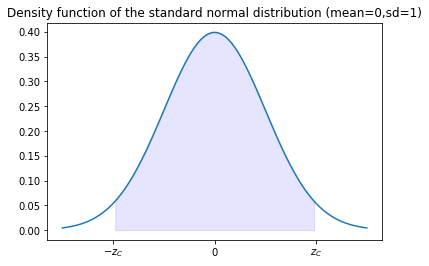

In [22]:
from math import sqrt
from scipy.stats import norm

mu = 0
sigma = 1
zc = 1.96
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = norm.pdf(x, mu, sigma)
xfill = np.linspace(-zc, zc)

plt.figure()
plt.title("Density function of the standard normal distribution (mean=0,sd=1)")
plt.fill_between(xfill, norm.pdf(xfill), y2=0, alpha=0.1, color='b')
plt.xticks([-tvalue,0,tvalue], ['$-z_C$','0','$z_C$'])
plt.plot(x,y)
plt.show()

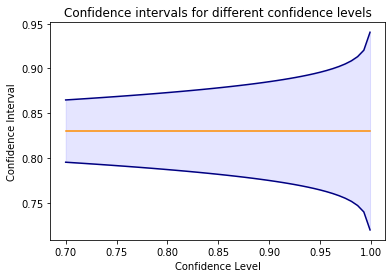

In [21]:
mymu = 0.83
mysd = 0.13
myn = 15

x = np.linspace(0.7, 0.999)
y_upper = 0.83+norm.ppf((1-x)/2)*mysd/sqrt(myn)
y_lower = 0.83-norm.ppf((1-x)/2)*mysd/sqrt(myn)
plt.figure()
plt.plot()
plt.plot(x,y_upper, color='navy')
plt.plot(x,y_lower, color='navy')
plt.plot([0.7,0.999],[0.83,0.83], color='darkorange')
plt.fill_between(x, y_upper, y2=y_lower, alpha=0.1, color='b')
plt.title('Confidence intervals for different confidence levels')
plt.xlabel('Confidence Level')
plt.ylabel('Confidence Interval')
plt.show()